# **A 7-taps re-programmable Finite Impulse Response filter on FPGA**
## **demo** - guitar experiment

#### project for MAPD module A - A.Y. 2021/22, University of Padua

*Amjadi Bahador*

In [1]:
#  install these dependencies:
# pip install soundfile

In [2]:
#importing essential libraries
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:

"""Defining Some Useful functions"""

#A function which converts .wav audio file to numpy array
def Audio_reader(file):
    data, samplerate = sf.read('./demo/sound_bank/{}'.format(file))
    channel= 0
    sig = data[:,channel] 
    return sig 

#Low pass filter using high number of taps
def Low_pass_filter(sig):
    h = np.array(signal.firwin(45, 0.2, fs=499, pass_zero=True )) 
    return signal.filtfilt(h, 1, sig)

#Low pass filter using 7 number of taps
def Fpga_filter(sig):
    h = np.array(signal.firwin(7, 0.2, fs=499, pass_zero=True )) 
    return signal.filtfilt(h, 1, sig)

#A function for normalizing the amplitude of filtered signal w.r.t to the recoded signal
def Normalizer(filtered_sig):  
    sig_slice_max = low_sig_slice.max()
    filtered_sig_slice_max = filtered_sig.max()
    return (sig_slice_max/filtered_sig_slice_max) * filtered_sig

#A function for plotting each signal seperately
def Signal_plotter(title, sig_type): #sig_type: True for high signals and false for low signals
    if sig_type == True: sig, time, sig_model   = high_sig_slice, high_time_slice, "High"
    else: sig, time, sig_model  = low_sig_slice, low_time_slice, "Low"
    plt.figure(figsize=(7,3))
    plt.plot(time, sig, color= '0')
    plt.xlabel('time')
    plt.ylabel('strain')
    plt.title('{} Tone {} Mode'.format(Signal_Tone, sig_model))
    plt.show()

#Plotting all the singals together for the sake of comparison
def Low_Fit_plotter(Py_filtered_sig, Fpga_filtered_sig):  #The main goal
    plt.figure(figsize=(8,4))
    plt.plot(low_time_slice, low_sig_slice, color='0', label='real pickup selector low-mode' )
    plt.plot(low_time_slice, Py_filtered_sig, 'r--', label ='45-taps FIR' )
    plt.plot(low_time_slice, Fpga_filtered_sig, 'g--', label ='7-taps FIR' )
    plt.xlabel('time')
    plt.ylabel('strain')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    
    plt.ylim(-y_max,y_max)
    plt.tight_layout()
    plt.legend(loc='upper right', fontsize = 'medium')
    plt.title('{} FIR-simulated low-mode vs recorded low-mode signal'.format(Signal_Tone))
    plt.show()
    
def High_Fit_plotter(Py_filtered_sig, Fpga_filtered_sig):  #To see the resultl of low-pass filtering
    plt.figure(figsize=(8,4))
    plt.plot(high_time_slice, high_sig_slice, color='0', label='High Signal' )
    plt.plot(high_time_slice, Py_filtered_sig, 'r--', label ='Python Low-Pass filtered Signal' )
    plt.plot(high_time_slice, Fpga_filtered_sig, 'g--', label ='Fpga Low-Pass filtered Signal' )
    plt.xlabel('time')
    plt.ylabel('signal')
    plt.ylim(-y_max,y_max )
    plt.legend()
    plt.title('{} Tone High Mode Singal'.format(Signal_Tone))

In [4]:
###################################################################################

"""Signal Selection"""


#Specifying the signal tone(Amp setting)


Signal_Tone = "Clean"   


#Choose between: {Clean, Acoustic, Bass, Funk Wah, High Gain, Metallica}


###################################################################################

In [5]:
"""Parameter Tuning"""

y_max_Dic={'Clean':0.1, 'Acoustic':0.3, 'Funk Wah':0.25, 'High Gain':1, 'Metallica': 1, 'Bass':0.2}
Shift_Dic={'Clean':0.015, 'Acoustic':0.006, 'Funk Wah': 0.055, 'High Gain':-0.034, 'Metallica': 0.0045, 'Bass':0.019}
T_S_Dic={'Clean':[3.99, 4.04], 'Acoustic':[4.01, 4.06], 'Funk Wah':[4, 4.05] , 'High Gain':[5, 5.05], 'Metallica': [5, 5.05], 'Bass':[3.99, 4.04]} 

m = 10**4                              #time-scale visualization
shift= Shift_Dic.get(Signal_Tone)      #shift moves low sig to left                                  
y_max = y_max_Dic.get(Signal_Tone)     #y axis limit
time_slice = T_S_Dic.get(Signal_Tone) 

In [6]:
"""Reading the Audio Files"""
sig_high = Audio_reader('{}_High.wav'.format(Signal_Tone))
sig_low = Audio_reader('{}_Low.wav'.format(Signal_Tone))

In [7]:
"""Applying the slice settings"""

#Applying the Slice setting w.r.t to time slice specified above
sig_low_time_slice =  [time_slice[0] + shift, time_slice[1] + shift]
high_time = np.linspace(1,sig_high.size/m, sig_high.size)  
low_time  = np.linspace(1,sig_low.size/m, sig_low.size)

high_sig_slice = sig_high[int(time_slice[0]* m) : int(time_slice[1]* m)]
delta = int(time_slice[1]* m) - int(time_slice[0]* m)
low_sig_slice  = sig_low[int(sig_low_time_slice[0]* m) : int(sig_low_time_slice[0]* m) + delta]

high_time_slice = high_time[int(time_slice[0] *m) : int(time_slice[1] *m)]
delta = int(time_slice[1] *m) - int(time_slice[0] *m) 
low_time_slice  = low_time[int(sig_low_time_slice[0] *m) : int(sig_low_time_slice[0] *m) + delta]

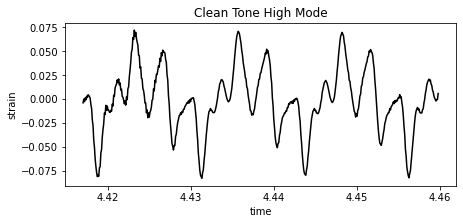

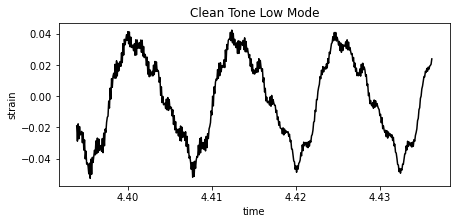

In [8]:
"""Plotting the time-sliced Signals"""
Signal_plotter("{} high signal".format(Signal_Tone), True)   #True for high signals 
Signal_plotter("{} low signal" .format(Signal_Tone), False)  #False for low signals

In [9]:
############################################################

"""Filtering the high signal"""

Py_filtered_sig = Low_pass_filter(high_sig_slice) 
Fpga_filtered_sig = Fpga_filter(high_sig_slice)

############################################################

In [10]:
#Applying Normalization
Py_filtered_sig = Normalizer(Py_filtered_sig) 
Fpga_filtered_sig = Normalizer(Fpga_filtered_sig) 

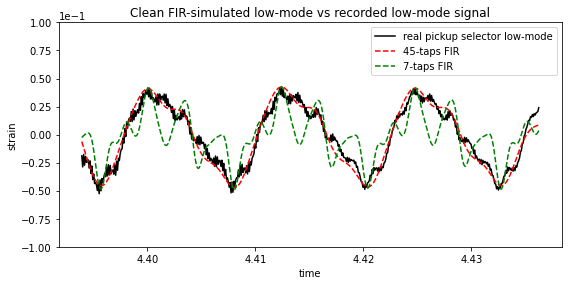

In [11]:
"""Plotting the result of low-pass filtering on high signal"""
# High_Fit_plotter(Py_filtered_sig, Fpga_filtered_sig)

"""Plotting the result of simulated vs recorded Low-mode signal """
Low_Fit_plotter(Py_filtered_sig, Fpga_filtered_sig)